# Importing libraries and datasets

In [1]:
# EDA and useful libraries
import pandas as pd
import numpy as np
import os
import nltk
import re
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Pre processing
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.preprocessing import label_binarize

# Classification models
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

# Display
pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 100000)

# Importing text files and loading to a dataset 1

Here I will try to get the text from each text file and store it into a dataframe. I will choose business, sport and tech as the three topics that will later be used to get the topic from journalist names.

In [3]:
from collections import defaultdict
from pathlib import Path

my_path = '/Users/Frank/python_projects/NLP_text_classification/bbc/business'

files = defaultdict(list)
for file in Path(my_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        #files["file_name"] = file.name
        files["text"].append(file_open.read())
buss = pd.DataFrame(files)
buss.head()

,text
0,UK economy facing 'major risks'\n\nThe UK manu...
1,Aids and climate top Davos agenda\n\nClimate c...
2,Asian quake hits European shares\n\nShares in ...
3,India power shares jump on debut\n\nShares in ...
4,Lacroix label bought by US firm\n\nLuxury good...


In [4]:
buss['text'] = buss['text'].astype('str')

In [5]:
my_path = '/Users/Frank/python_projects/NLP_text_classification/bbc/sport'

files = defaultdict(list)
for file in Path(my_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        #files["file_name"] = file.name
        files["text"].append(file_open.read())
sport = pd.DataFrame(files)
sport.head()

,text
0,Fuming Robinson blasts officials\n\nEngland co...
1,Veteran Martinez wins Thai title\n\nConchita M...
2,Spurs to sign Iceland U21 star\n\nTottenham ar...
3,Mexicans tracking unhappy Juninho\n\nMexican o...
4,Mirza makes Indian tennis history\n\nTeenager ...


In [6]:
sport['text'] = sport['text'].astype('str')

In [7]:
my_path = '/Users/Frank/python_projects/NLP_text_classification/bbc/tech'

files = defaultdict(list)
for file in Path(my_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        #files["file_name"] = file.name
        files["text"].append(file_open.read())
tech = pd.DataFrame(files)
tech.head()

,text
0,Mobiles rack up 20 years of use\n\nMobile phon...
1,Broadband steams ahead in the US\n\nMore and m...
2,EA to take on film and TV giants\n\nVideo game...
3,Microsoft releases patches\n\nMicrosoft has wa...
4,China 'to overtake US net use'\n\nThe Chinese ...


In [8]:
tech['text'] = tech['text'].astype('str')

In [9]:
my_path = '/Users/Frank/python_projects/NLP_text_classification/bbc/politics'

files = defaultdict(list)
for file in Path(my_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        #files["file_name"] = file.name
        files["text"].append(file_open.read())
politics = pd.DataFrame(files)
politics.head()

,text
0,Baron Kinnock makes Lords debut\n\nFormer Labo...
1,Howard taunts Blair over splits\n\nTony Blair'...
2,Donor attacks Blair-Brown 'feud'\n\nThe report...
3,Cardinal criticises Iraq war cost\n\nBillions ...
4,BNP leader Nick Griffin arrested\n\nThe leader...


In [10]:
politics['text'] = politics['text'].astype('str')

In [11]:
my_path = '/Users/Frank/python_projects/NLP_text_classification/bbc/entertainment'

files = defaultdict(list)
for file in Path(my_path).iterdir():
    with open(file, "r", encoding='latin-1') as file_open:
        #files["file_name"] = file.name
        files["text"].append(file_open.read())
entertainment = pd.DataFrame(files)
entertainment.head()

,text
0,Musicians to tackle US red tape\n\nMusicians' ...
1,"U2's desire to be number one\n\nU2, who have w..."
2,Rocker Doherty in on-stage fight\n\nRock singe...
3,Snicket tops US box office chart\n\nThe film a...
4,Ocean's Twelve raids box office\n\nOcean's Twe...


In [12]:
entertainment['text'] = entertainment['text'].astype('str')

# Data preprocessing 

Creating functions that will help cleaning up, tokenize and remove stopword from text

In [104]:
def clean_up(s):
    w = re.sub(r'/w+', ' ', s).replace("'", ' ').replace('\\n','').lower()
    w = re.sub(r"[^a-zA-Z]", " ", w)
    return w

def stem_and_lemmatize(l):
    #I have decided to do only lemmatization to keep the words meanings for multi classification
    #ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(w) for w in l]
    return a

def tokenize(s):
    w = nltk.word_tokenize(s)
    return w   

def remove_stopwords(s):
    stop_words = stopwords.words('english')
    w = [x for x in s if x not in stop_words]
    return w

Applying functions to perform preprocessing on text - cleaning up characters, tokenization, stemming, lematization and stopwords removal 

In [14]:
buss['text_processed'] = buss.apply(lambda x : remove_stopwords(
    (tokenize(clean_up(x['text'])))), axis = 1)

Adding a label column to the business dataframe

In [15]:
buss['label'] = 'business'

In [16]:
buss.tail()

,text,text_processed,label
505,Jobs growth still slow in the US\n\nThe US cre...,"[jobs, growth, still, slow, us, us, created, f...",business
506,Renault boss hails 'great year'\n\nStrong sale...,"[renault, boss, hails, great, year, strong, sa...",business
507,Euro firms miss out on optimism\n\nMore than 9...,"[euro, firms, miss, optimism, large, companies...",business
508,Bank holds interest rate at 4.75%\n\nThe Bank ...,"[bank, holds, interest, rate, bank, england, l...",business
509,Iraqi voters turn to economic issues\n\nBeyond...,"[iraqi, voters, turn, economic, issues, beyond...",business


In [17]:
buss.shape

(510, 3)

In [18]:
sport['text_processed'] = sport.apply(lambda x : remove_stopwords(
    (tokenize(clean_up(x['text'])))), axis = 1)

In [19]:
sport['label'] = 'sport'

In [20]:
sport.head()

,text,text_processed,label
0,Fuming Robinson blasts officials\n\nEngland co...,"[fuming, robinson, blasts, officials, england,...",sport
1,Veteran Martinez wins Thai title\n\nConchita M...,"[veteran, martinez, wins, thai, title, conchit...",sport
2,Spurs to sign Iceland U21 star\n\nTottenham ar...,"[spurs, sign, iceland, u, star, tottenham, pri...",sport
3,Mexicans tracking unhappy Juninho\n\nMexican o...,"[mexicans, tracking, unhappy, juninho, mexican...",sport
4,Mirza makes Indian tennis history\n\nTeenager ...,"[mirza, makes, indian, tennis, history, teenag...",sport


In [21]:
sport.shape

(511, 3)

In [22]:
tech['text_processed'] = tech.apply(lambda x : remove_stopwords(
    (tokenize(clean_up(x['text'])))), axis = 1)

In [23]:
tech['label'] = 'tech'

In [24]:
tech.head()

,text,text_processed,label
0,Mobiles rack up 20 years of use\n\nMobile phon...,"[mobiles, rack, years, use, mobile, phones, uk...",tech
1,Broadband steams ahead in the US\n\nMore and m...,"[broadband, steams, ahead, us, americans, join...",tech
2,EA to take on film and TV giants\n\nVideo game...,"[ea, take, film, tv, giants, video, game, gian...",tech
3,Microsoft releases patches\n\nMicrosoft has wa...,"[microsoft, releases, patches, microsoft, warn...",tech
4,China 'to overtake US net use'\n\nThe Chinese ...,"[china, overtake, us, net, use, chinese, net, ...",tech


In [25]:
tech.shape

(401, 3)

In [30]:
politics['text_processed'] = politics.apply(lambda x : remove_stopwords(
    (tokenize(clean_up(x['text'])))), axis = 1)

politics['label'] = 'politics'

politics.head()

,text,text_processed,label
0,Baron Kinnock makes Lords debut\n\nFormer Labo...,"[baron, kinnock, makes, lords, debut, former, ...",politics
1,Howard taunts Blair over splits\n\nTony Blair'...,"[howard, taunts, blair, splits, tony, blair, f...",politics
2,Donor attacks Blair-Brown 'feud'\n\nThe report...,"[donor, attacks, blair, brown, feud, reported,...",politics
3,Cardinal criticises Iraq war cost\n\nBillions ...,"[cardinal, criticises, iraq, war, cost, billio...",politics
4,BNP leader Nick Griffin arrested\n\nThe leader...,"[bnp, leader, nick, griffin, arrested, leader,...",politics


In [31]:
entertainment['text_processed'] = entertainment.apply(lambda x : remove_stopwords(
    (tokenize(clean_up(x['text'])))), axis = 1)

entertainment['label'] = 'entertainment'

entertainment.head()

,text,text_processed,label
0,Musicians to tackle US red tape\n\nMusicians' ...,"[musicians, tackle, us, red, tape, musicians, ...",entertainment
1,"U2's desire to be number one\n\nU2, who have w...","[u, desire, number, one, u, three, prestigious...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,"[rocker, doherty, stage, fight, rock, singer, ...",entertainment
3,Snicket tops US box office chart\n\nThe film a...,"[snicket, tops, us, box, office, chart, film, ...",entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,"[ocean, twelve, raids, box, office, ocean, twe...",entertainment


# Bag of words

The purpose of this step is to create a bag of words from the processed data. The bag of words contains all the unique words in my whole text body (a.k.a. corpus) with the number of occurrence of each word. It will allow me to understand which words are the most important features across the whole corpus.

In [32]:
from nltk.probability import FreqDist
words = [w for l in politics['text_processed'] for w in l]
fdist = FreqDist(words)
fdist

FreqDist({'said': 2241, 'mr': 1686, 'would': 1054, 'labour': 767, 'government': 732, 'people': 623, 'election': 608, 'party': 586, 'blair': 578, 'also': 452, ...})

In [33]:
politics_top_words = [w[0] for w in fdist.most_common(5000)]
politics_top_words

['said',
 'mr',
 'would',
 'labour',
 'government',
 'people',
 'election',
 'party',
 'blair',
 'also',
 'minister',
 'new',
 'brown',
 'could',
 'told',
 'uk',
 'one',
 'public',
 'howard',
 'plans',
 'prime',
 'year',
 'tory',
 'say',
 'secretary',
 'tax',
 'britain',
 'bbc',
 'chancellor',
 'leader',
 'tories',
 'lord',
 'home',
 'general',
 'says',
 'time',
 'next',
 'make',
 'two',
 'campaign',
 'last',
 'get',
 'tony',
 'police',
 'mps',
 'law',
 'spokesman',
 'years',
 'made',
 'british',
 'first',
 'country',
 'lib',
 'may',
 'added',
 'us',
 'liberal',
 'work',
 'issue',
 'michael',
 'local',
 'take',
 'way',
 'eu',
 'bill',
 'vote',
 'like',
 'council',
 'saying',
 'think',
 'political',
 'part',
 'going',
 'want',
 'many',
 'week',
 'rights',
 'back',
 'parties',
 'report',
 'house',
 'system',
 'office',
 'conservative',
 'ministers',
 'immigration',
 'kennedy',
 'foreign',
 'war',
 'ukip',
 'expected',
 'right',
 'health',
 'voters',
 'go',
 'world',
 'claims',
 'without'

# Merging datasets into one dataset of text for each topic  

In [34]:
ds1 = pd.concat([buss, sport, tech, politics, entertainment], ignore_index=True)

In [38]:
ds1.head()

,text,text_processed,label
0,UK economy facing 'major risks'\n\nThe UK manu...,"[uk, economy, facing, major, risks, uk, manufa...",business
1,Aids and climate top Davos agenda\n\nClimate c...,"[aids, climate, top, davos, agenda, climate, c...",business
2,Asian quake hits European shares\n\nShares in ...,"[asian, quake, hits, european, shares, shares,...",business
3,India power shares jump on debut\n\nShares in ...,"[india, power, shares, jump, debut, shares, in...",business
4,Lacroix label bought by US firm\n\nLuxury good...,"[lacroix, label, bought, us, firm, luxury, goo...",business


In [36]:
ds1.shape

(2225, 3)

# Defining a function that counts the number of words

In [39]:
#Avg word count by topic
def word_count(text):
    return len(str(text).split(' '))

ds1['word_count'] = ds1['text_processed'].apply(word_count)
avg_wc = ds1.groupby('label').mean().reset_index()
avg_wc[['label','word_count']]

,label,word_count
0,business,193.364706
1,entertainment,191.531088
2,politics,253.189448
3,sport,182.162427
4,tech,286.453865


In [40]:
ds1.head()

,text,text_processed,label,word_count
0,UK economy facing 'major risks'\n\nThe UK manu...,"[uk, economy, facing, major, risks, uk, manufa...",business,190
1,Aids and climate top Davos agenda\n\nClimate c...,"[aids, climate, top, davos, agenda, climate, c...",business,256
2,Asian quake hits European shares\n\nShares in ...,"[asian, quake, hits, european, shares, shares,...",business,331
3,India power shares jump on debut\n\nShares in ...,"[india, power, shares, jump, debut, shares, in...",business,112
4,Lacroix label bought by US firm\n\nLuxury good...,"[lacroix, label, bought, us, firm, luxury, goo...",business,100


# Plotting distribution of top words by topic

In [41]:
#Preparing the dataframes

#Splitting the df into the different categories
df_business = ds1.loc[ds1['label'] == 'business'] 
df_sports = ds1.loc[ds1['label'] =='sport']
df_tech = ds1.loc[ds1['label'] == 'tech']
df_politics = ds1.loc[ds1['label'] == 'politics'] 
df_entertainment = ds1.loc[ds1['label'] == 'entertainment']

In [42]:
#Randomly sampling business and sports to create imbalanced classes
#df_business = df_business.sample(n=500, random_state=3)
#df_tech = df_tech.sample(n=390, random_state=3)

In [33]:
#merging dataframe back again
#df = pd.concat([df_business, df_sports, df_tech, df_politics])

Converting labels to numbers

In [43]:
LE = LabelEncoder()
ds1['numeric_label'] = LE.fit_transform(ds1['label'])

display(ds1.groupby(['label'])['text_processed'].count())
#display(df_holdout.groupby(['label'])['text_processed'].count())
display(ds1['label'].unique())
display(ds1['numeric_label'].unique())

label
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: text_processed, dtype: int64

array(['business', 'sport', 'tech', 'politics', 'entertainment'],
      dtype=object)

array([0, 3, 4, 2, 1])

# Top 20 words by topic

In [44]:
def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [47]:
top_n = 20

text_business = buss['text_processed'].tolist()
text_tech = tech['text_processed'].tolist()
text_sports = sport['text_processed'].tolist()
text_politics = politics['text_processed'].tolist()
text_entertainment = entertainment['text_processed'].tolist()


bus = word_freq(text_business, top_n=top_n)
tech = word_freq(text_tech, top_n=top_n)
sports = word_freq(text_sports, top_n=top_n)
pol = word_freq(text_politics, top_n=top_n)
entert = word_freq(text_entertainment, top_n=top_n)

df_wf = pd.concat([bus, tech, sports, pol, entert], axis=1)
cols = ['business', 'count', 'tech', 'count', 'sports', 'count', 'politics', 'count', 'entertainment', 'count'] 
df_wf.columns = cols
df_wf

,business,count,tech,count,sports,count,politics,count,entertainment,count
0,said,1680,said,1567,said,942,said,2241,said,825
1,us,828,people,961,year,494,mr,1686,film,788
2,bn,785,one,538,first,484,would,1054,best,619
3,year,713,also,537,game,482,labour,767,year,456
4,mr,600,new,517,england,461,government,732,music,435
5,would,464,mr,509,time,423,people,623,also,398
6,also,440,technology,504,win,419,election,608,one,376
7,market,434,mobile,494,would,396,party,586,us,372
8,new,417,would,471,two,394,blair,578,show,330
9,company,416,could,469,world,388,also,452,new,323


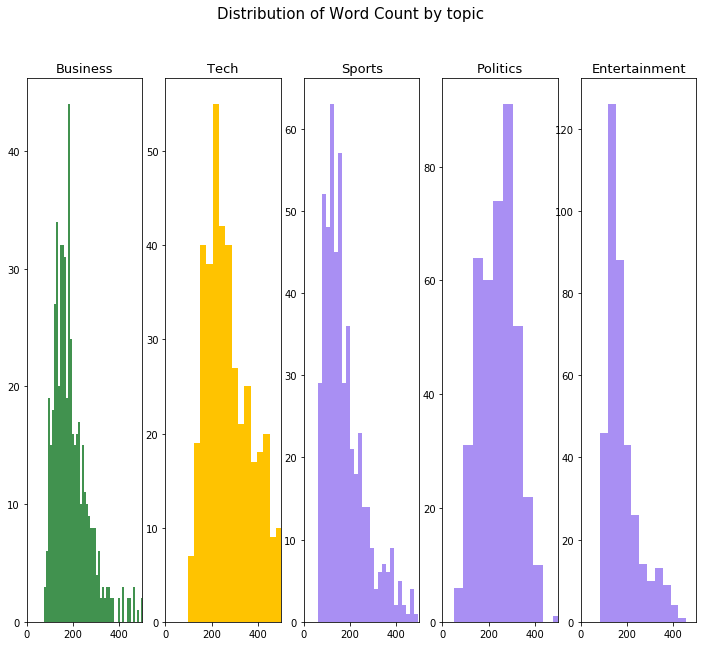

In [59]:
#Plot the distribution of word count by article

fig, ax = plt.subplots(1, 5, figsize = (12,10))
fig.suptitle('Distribution of Word Count by topic', fontsize=15)

bins = 50

ax[0].hist(df_business['word_count'], bins = bins, color = '#41924F')
ax[0].set_title('Business', fontsize = 13)
ax[0].set_xlim(0, 500)

ax[1].hist(df_tech['word_count'], bins = bins, color = '#FFC300')
ax[1].set_title('Tech', fontsize = 13)
ax[1].set_xlim(0, 500)

ax[2].hist(df_sports['word_count'], bins = bins, color = '#a98ff3')
ax[2].set_title('Sports', fontsize = 13)
ax[2].set_xlim(0, 500)

ax[3].hist(df_politics['word_count'], bins = bins, color = '#a98ff3')
ax[3].set_title('Politics', fontsize = 13)
ax[3].set_xlim(0, 500)

ax[4].hist(df_entertainment['word_count'], bins = bins, color = '#a98ff3')
ax[4].set_title('Entertainment', fontsize = 13)
ax[4].set_xlim(0, 500)


plt.show()

# Building features

# TF-IDF

The ‘term frequency’ is just the number of times a word appears in a document, divided by the total number of words in that document. The ‘inverse document frequency’ is the logarithm of the number of total documents divided by the number of documents the word appears in.

In [62]:
ds1.head()

,text,text_processed,label,word_count,numeric_label
0,UK economy facing 'major risks'\n\nThe UK manu...,"[uk, economy, facing, major, risks, uk, manufa...",business,190,0
1,Aids and climate top Davos agenda\n\nClimate c...,"[aids, climate, top, davos, agenda, climate, c...",business,256,0
2,Asian quake hits European shares\n\nShares in ...,"[asian, quake, hits, european, shares, shares,...",business,331,0
3,India power shares jump on debut\n\nShares in ...,"[india, power, shares, jump, debut, shares, in...",business,112,0
4,Lacroix label bought by US firm\n\nLuxury good...,"[lacroix, label, bought, us, firm, luxury, goo...",business,100,0


In [64]:
ds1.shape

(2225, 5)

In [66]:
# Creating the features (tf-idf weights) for the processed text

texts = ds1['text_processed'].astype('str')

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                   min_df = 2, 
                                   max_df = .95)

X = tfidf_vectorizer.fit_transform(texts) #features
y = ds1['numeric_label'].values #target

print (X.shape)
print(y.shape)

(2225, 82331)
(2225,)


# Dimensionality reduction

LSA uses SVD or Singular Value Decomposition (and in particular Truncated SVD) to reduce the number of dimensions and select the best ones.

In [67]:
#Dimenionality reduction for 50 best features per topic

lsa = TruncatedSVD(n_components=100, 
                   n_iter=10, 
                   random_state=3)

X = lsa.fit_transform(X)
X.shape

(2225, 100)

# Model selection and evaluation

In [68]:
#Creating a dictionary of the models
model_dict = {'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()}
              

#Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)

In [69]:
#Function to get the scores for each model in a dataset
def model_score_df(model_dict):   
    model_name, ac_score_list, f1_score_list = [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model_name,accuracy_score,f1_score
0,Stochastic Gradient Descent,0.964045,0.963842
1,Random Forest,0.955056,0.953679
5,K Nearest Neighbor,0.934831,0.932115
2,Decsision Tree,0.901124,0.898655
4,Gaussian Naive Bayes,0.880899,0.8785
3,AdaBoost,0.847191,0.837685


# Stochastic gradient descent - Hyperparameters

SGD with logistic regression works well for text classification because it can deal with sparse data like we have with text. The objective of gradient descent is to find the best parameters to optimize a given function. In our case that would be the loss function of which we are trying to find the local minimum. 

In [70]:
#Hyperparameter tuning

#SGD
loss =  ['log']
penalty = ['l2','l1']
alpha = [1e-6, 1e-3, 1e-1]
max_iter = [5, 1000, 10000]
tol = [None, 1e-3]
eta0 = [0.1, 0.001]

random_state = [3]

clf = SGDClassifier()

params = dict(loss=loss,
              penalty=penalty,
              alpha=alpha,
              max_iter=max_iter,
              tol=tol,
              random_state=random_state)

#Gridsearch with 5-fold cross validation
'''Gridsearch simply goes through all possible combinations for all the values for each 
hyperparameter you give it and returns the best one based on a score.'''
gridsearch = GridSearchCV(clf,
                          params,
                          cv = 5,
                          verbose = 1, 
                          n_jobs = -1)

sgd_best_model = gridsearch.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 18.3min finished


In [71]:
print(sgd_best_model)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1e-06, 0.001, 0.1], 'loss': ['log'],
                         'max_iter': [5, 1000, 10000], 'penalty': ['l2', 'l1'],
                         'random_state': [3], 'to

In [53]:
#Define the best models with the selected params from the gridsearch
sgd_best_model = SGDClassifier(alpha=0.0001,
                               loss='log',
                               max_iter=1000,
                               penalty='l2',
                               learning_rate = 'optimal',
                               eta0 = 0.0,
                               random_state = 3,
                               tol=0.001)

# ROC and Confusion matrix evaluation

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.7min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished


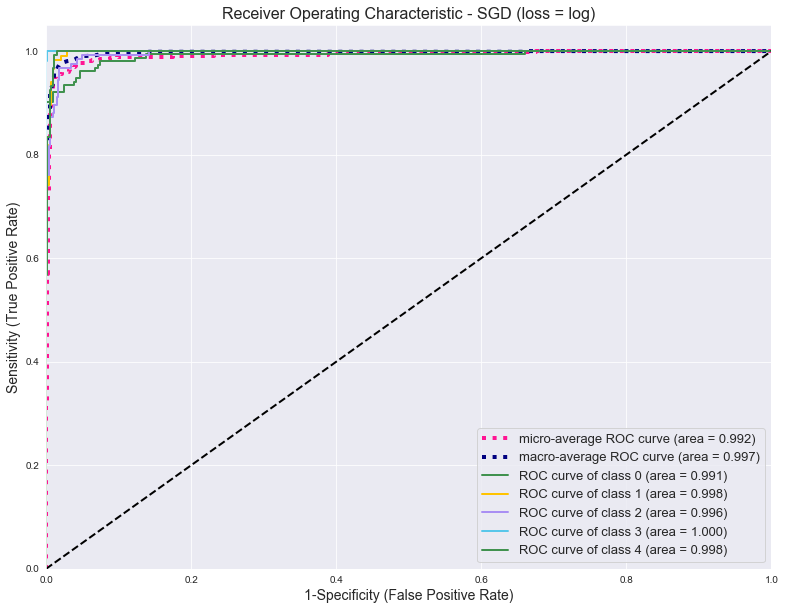

In [75]:
#Plot AUC - SGD

#Binarize the labels
y_b = label_binarize(y, classes = [0, 1, 2, 3, 4])
n_classes = y_b.shape[1]

#Shuffle and split training and test sets with stratified sampling and binarized labels
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,
                                                            y_b,
                                                            test_size = 0.3,
                                                            shuffle = True,
                                                            stratify = y,
                                                            random_state = 3)

#Learn to predict each class against the other
sgd_classifier = OneVsRestClassifier(sgd_best_model)

y_score = sgd_classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure(figsize=(13,10)) 
sns.set_style('darkgrid')
lw=2

plt.plot(fpr['micro'], 
         tpr['micro'], 
         label='micro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['micro']),
         color='deeppink',
         linestyle=':', 
         linewidth=4)

plt.plot(fpr['macro'], 
         tpr['macro'], 
         label='macro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['macro']),
         color='navy', 
         linestyle=':', 
         linewidth=4)

colors = cycle(['#41924F', '#FFC300', '#a98ff3', '#59C7EA', '#41924F'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], 
             color=color, 
             lw=lw, 
             label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontsize = 14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize = 14)
plt.title('Receiver Operating Characteristic - SGD (loss = log)', fontsize = 16)
plt.legend(loc="lower right", fontsize = 13)
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.1min finished


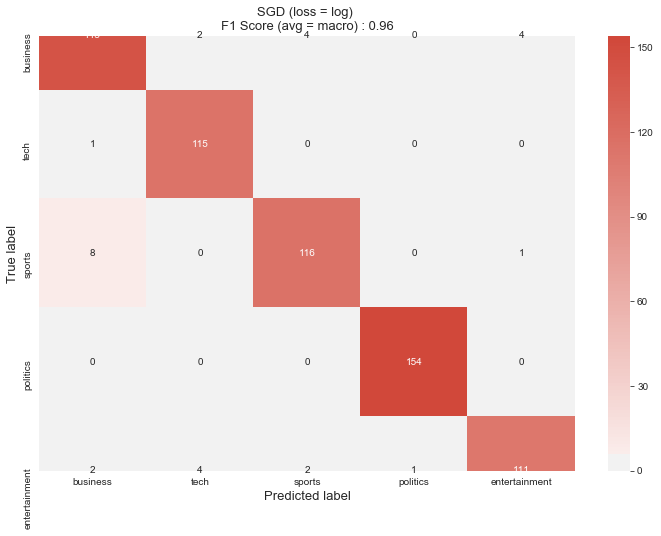

In [76]:
#Confusion Matrix - SGD
# This matrix shows the discrepancies between predicted and actual labels

#Train test split with stratified sampling. Using non-binarized labels
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)
#Fit the training data
sgd_best_model.fit(X_train, y_train)

#Predict the testing data
y_pred = sgd_best_model.predict(X_test)

#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['business','tech','sports', 'politics', 'entertainment'], 
                     columns = ['business','tech','sports', 'politics', 'entertainment'])

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('SGD (loss = log) \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

# Importing dataset 2

In [105]:
ds2 = pd.read_csv('./all-the-news/articles1.csv', index_col=None)
ds2.drop(columns = ['Unnamed: 0','title','id','publication','date','year','month','url'], inplace=True)

In [106]:
ds2.shape

(50000, 2)

In [107]:
ds2.head()

,author,content
0,Carl Hulse,WASHINGTON — Congressional Republicans have...
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood..."
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,William McDonald,"Death may be the great equalizer, but it isn’t..."
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ..."


Now I will be cleaning up the text written by each journalist like I have done for each topic previously and add a new column to the existing dataframe

In [108]:
ds2['content'] = ds2['content'].astype('str')

In [109]:
ds2['content_processed'] = ds2.apply(lambda x : remove_stopwords(
    (stem_and_lemmatize(tokenize(clean_up(x['content']))))), axis = 1)

In [110]:
# Defining a function that counts the words per journalist 
def word_count(text):
    return len(str(text).split(' '))

ds2['word_count'] = ds2['content_processed'].apply(word_count)

In [111]:
ds2.head()

,author,content,content_processed,word_count
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republican, new, f...",508
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...","[bullet, shell, get, counted, blood, dry, voti...",2591
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...","[walt, disney, bambi, opened, critic, praised,...",1334
3,William McDonald,"Death may be the great equalizer, but it isn’t...","[death, may, great, equalizer, necessarily, ev...",1212
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...","[seoul, south, korea, north, korea, leader, ki...",432


# Predict topics using dataset 2

In [115]:
unseen = ds2['content_processed'].astype('str') 

#Use the saved models to transform the unseen text with tf-idf and lsa
X_unseen_tfidf = tfidf_vectorizer.transform(unseen) 
X_unseen = lsa.transform(X_unseen_tfidf)

#Fit the models with the best params on the full data
sgd_best_model.fit(X, y)

#Make the prediction on the unseen articles with the fitted best models and put it into a df alongside the correct labels
ds2['prediction_SGD'] = sgd_best_model.predict(X_unseen)

ds2 = ds2.drop('content_processed', 1)
ds2 = ds2[['author','content', 'prediction_SGD']]



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 18.6min finished


array(['business', 'sport', 'tech', 'politics', 'entertainment'],
      dtype=object)
array([0, 3, 4, 2, 1])

In [119]:
ds2['Topics'] = ['Business' if x == 0 else 'Sports' if x == 3 else 'Tech' if x == 4 else 'Politics' if x == 2 else 'Entertainment' for x in ds2['prediction_SGD']]

In [120]:
ds2.head()

,author,content,prediction_SGD,Topics
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,Business
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,Politics
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,Entertainment
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,Entertainment
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,Business


In [121]:
# export dataset to csv file
ds2.to_csv('topic_prediction_per_journalist.csv',index=False)